# Supervised Learning Project 1: Part 1

This project implements various regression models from scratch. For this section, I first fit models to toy datasets.

## Import Required Libraries

In [1]:
#Importing libraries    
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Linear Regression on Toy Dataset 1

### Create initial toy dataset and visualize

In [2]:
#Create datapoints array and reshape into (4x1) vectors
x = np.array([1, 2, 3, 4]).reshape(4, 1)
y = np.array([3, 2, 0, 5]).reshape(4, 1)

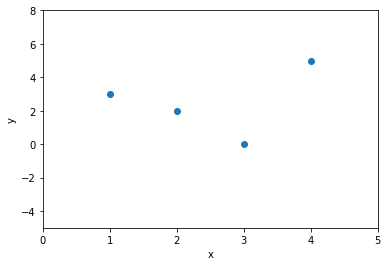

In [3]:
#Visualize datapoints
plt.scatter(x, y)
plt.xlim(0, 5)
plt.ylim(-5, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Fitting polynomial feature maps to data using least squares regression

In [4]:
#Computes the polynomial basis
def phi(x, k):
  """ Computes a single basis function $x^{k-1}$, given an input vector x of shape (m, 1) and the value k. m is the number of training examples """
  return x**(k-1)

#This function creates the feature map PHI()
def PHI(x, k):
  """ Creates the feature map, which is a matrix of shape (m, k). Each column is the kth basis function applied on 
  the input vector x of shape (m, 1). m is the number of training examples """

  #Number of training examples
  m = x.shape[0]

  #Initialize a feature map of shape (m, k) with 0s in it.
  feature_map = np.zeros((m, k))

  #In every column, replace the zeros with the basis function k computed on input vector x
  for i in range(0, k):
    feature_map[:, i] = phi(x.squeeze(), i+1)

  return feature_map

In [5]:
#Compute transformed feature maps for k = {1,...,4} 
x_tr_k1 = PHI(x, k=1)
x_tr_k2 = PHI(x, k=2)
x_tr_k3 = PHI(x, k=3)
x_tr_k4 = PHI(x, k=4)

#Check mapping for k=3. Should be a (4, 3) matrix.
print("Transformed dataset for k = {}:\n".format(3))
print(x_tr_k3)

Transformed dataset for k = 3:

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [6]:
#Compute weights for the transformed data using least squares regression formula above
w_k1 = np.linalg.inv(x_tr_k1.T @ x_tr_k1) @ x_tr_k1.T @ y
w_k2 = np.linalg.inv(x_tr_k2.T @ x_tr_k2) @ x_tr_k2.T @ y
w_k3 = np.linalg.inv(x_tr_k3.T @ x_tr_k3) @ x_tr_k3.T @ y
w_k4 = np.linalg.inv(x_tr_k4.T @ x_tr_k4) @ x_tr_k4.T @ y

#Check weights for k=3. Should be a (k, 1) vector.
print("Weights k = {}\n".format(3))
print(w_k3)

Weights k = 3

[[ 9. ]
 [-7.1]
 [ 1.5]]


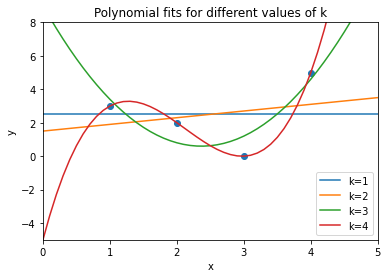

In [7]:
#Plot curves by selecting a set of points between 0 and 10
X = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_k1 = PHI(X, k=1) @ w_k1
Y_k2 = PHI(X, k=2) @ w_k2
Y_k3 = PHI(X, k=3) @ w_k3
Y_k4 = PHI(X, k=4) @ w_k4

#Plot the original data points
plt.scatter(x, y)

#Plot curves
plt.plot(X, Y_k1)
plt.plot(X, Y_k2)
plt.plot(X, Y_k3)
plt.plot(X, Y_k4)

#Extra steps to make the graph well formatted
plt.xlim(0, 5)
plt.ylim(-5, 8)
plt.legend(['k=1', 'k=2', 'k=3', 'k=4'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fits for different values of k')
#Save results
plt.savefig('polyfit.png')
plt.show()

### Define equations for varied polynomial dimensions

In [8]:
#Print the weights that we computed earlier for k=1,...,4. Should be (k, 1) vectors for dimension of polynomial basis we are dealing with
print("Weights for k=1 :\n ", w_k1, "\n")
print("Weights for k=2 :\n ", w_k2, "\n")
print("Weights for k=3 :\n ", w_k3, "\n")
print("Weights for k=4 :\n ", w_k4)

Weights for k=1 :
  [[2.5]] 

Weights for k=2 :
  [[1.5]
 [0.4]] 

Weights for k=3 :
  [[ 9. ]
 [-7.1]
 [ 1.5]] 

Weights for k=4 :
  [[-5.        ]
 [15.16666667]
 [-8.5       ]
 [ 1.33333333]]


Equations for the polynomial models:

For $k = 1 : y = 2.5$

For $k = 2 : y = 1.5 + 0.4x$

For $k = 3 : y = 9.0 - 7.1x + 1.5x^2$

For $k = 4 : y = -5.0 + 15.17x -8.5x^2 + 1.33x^3$


### Compute MSE for the different polynomial equations

In [9]:
def MSE(x_values, y_values, weights):
  """ 
  Computes the MSE given the x_values matrix (m, n), y_values vector of shape (m, 1) and weights vector of shape (n, 1). 
  m is the number of training examples, n is the number of input features.
  """
  m = x_values.shape[0]
  SSE = ((x_values @ weights) - y_values).T @ ((x_values @ weights) - y_values)
  MSE = SSE / m
  return MSE

In [10]:
#Print MSE values for each of the polynomial bases
print("MSE for k = 1 : " + str(MSE(x_tr_k1, y, w_k1).item()))
print("MSE for k = 2 : " + str(MSE(x_tr_k2, y, w_k2).item()))
print("MSE for k = 3 : " + str(MSE(x_tr_k3, y, w_k3).item()))
print("MSE for k = 4 : " + str(MSE(x_tr_k4, y, w_k4).item()))

MSE for k = 1 : 3.25
MSE for k = 2 : 3.05
MSE for k = 3 : 0.7999999999999996
MSE for k = 4 : 3.4942940895563015e-23


## Linear Regression on Toy Dataset 2 

I now fit a second toy dataset modelled by the equation

>$$g_\sigma(x) := \sin^2(2 \pi x) + \epsilon$$

where $x$ is the input and $\epsilon$ is Gaussian noise with mean 0 and standard deviation $\sigma$. Here I choose $\sigma = 0.07$. The functions below generate the data.

In [11]:
def g_sigma(x, sigma):
  """
  Random function of form g_sigma(x) = sin^2(2*pi*x) + epsilon where epsilon is a Gaussian distributed random variable 
  with mean 0 and sigma^2 variance. 
  
  Takes an input x and returns the value g_sigma(x) with an added noise value 
  generated from epsilon. 
  """

  #Compute function on the point x
  function = np.square(np.sin(2 * np.pi * x))
  #Generate a single noise value for that point x
  noise = np.random.normal(0.0, sigma)
  
  return function + noise

In [12]:
def generate_data(interval, size, sigma):
  """
  Generates a random sample {(x_1, g_1),...,(x_m, g_m)}. First samples a single x value from the interval
  and then computes g_sigma = sin^2(2pi*x) + epsilon, where epsilon is random gaussian noise.

  Args
  ----
  interval - tuple of (lower_bound, upper_bound)
  size - number of points to generate
  sigma - standard deviation of the noise

  Returns
  -------
  NumPy arrays of the generated input and output data
  """
  
  #This will store the x_values and g_sigma(x) values
  x_values = []
  g_values = []

  for i in range(size):
    
    #Generate a single point
    x = np.random.uniform(interval[0], interval[1])
    #Create the output value using the random function
    g = g_sigma(x, sigma=sigma)
    #Append the values to the list
    x_values.append(x)
    g_values.append(g)

  return np.array(x_values), np.array(g_values)

### Generate Data and Visualize

In [13]:
#Generate training data - set a seed for ensuring reproducible results
np.random.seed(1)
x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

print("x_train shape: ", x_train.shape)
print("g_train shape: ", g_train.shape)

x_train shape:  (30,)
g_train shape:  (30,)


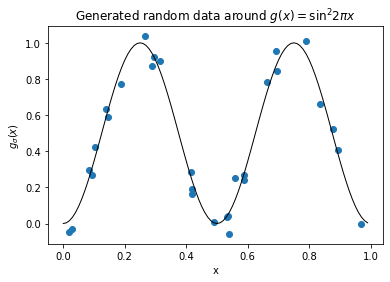

In [14]:
#Plotting deterministic function (sin^2(2*pi*x) without the random noise)
x = np.arange(0, 1, 0.01)
y = np.sin(2 * np.pi * x)**2

#Plotting generated data
plt.scatter(x_train, g_train)

#Plot the function curve
plt.plot(x, y, color='black', linewidth=1)

#Extra steps for formatting image
plt.xlabel('x')
plt.ylabel('$g_\sigma(x)$')
plt.title("Generated random data around $g(x) = \sin^2{2 \pi x}$")
plt.savefig('random_data.png')
plt.show()

### Fit data with polynomial bases $k = 2, 5, 10, 14, 18$

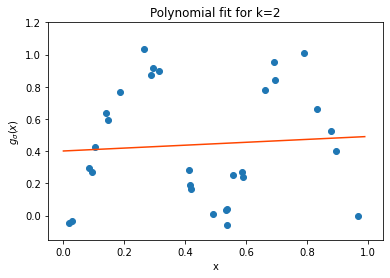

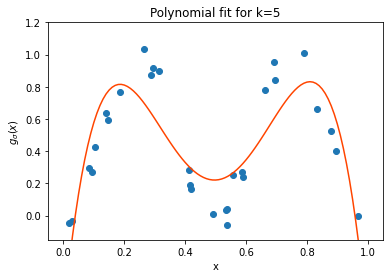

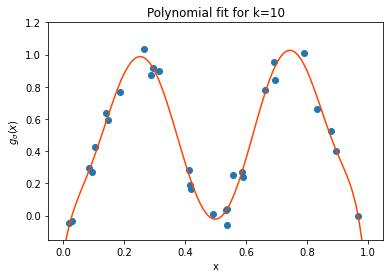

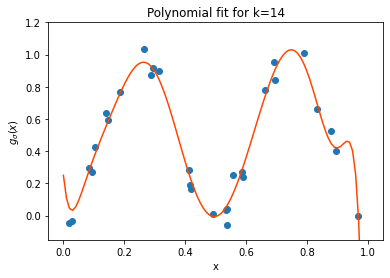

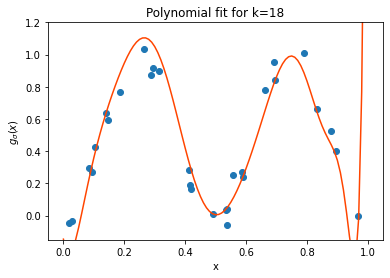

In [15]:
#Stores the values of polynomial basis dimensions
k_values = [2, 5, 10, 14, 18]

#Iterate over each k
for i in range(len(k_values)):

  #Create a new figure
  plt.figure()

  #Plot the original data points
  plt.scatter(x_train, g_train)

  #Compute feature maps and weights
  x_transformed = PHI(x_train, k_values[i])

  #Computing the weights using least squares regression. In case we encounter singular matrices, I've added the psuedoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Select a set of points between 0 and 1 for plotting the fitted curve
  X = np.arange(0, 1, 0.01).reshape(-1, 1)
  #Create the feature map and compute the function values
  Y = PHI(X, k_values[i]) @ w

  #Plot fitted curve
  plt.plot(X, Y, color='orangered')

  #Extra steps for formatting the plot
  plt.xlim(-0.05, 1.05)
  plt.ylim(-0.15, 1.20)
  plt.xlabel('x')
  plt.ylabel('$g_\sigma(x)$')
  plt.title('Polynomial fit for k={}'.format(k_values[i]))
  plt.savefig('fitted_curves_k={}.png'.format(k_values[i]))
  plt.show()

### Plot log train MSE over $k = 1,\cdots,18$

I now plot the log train MSE for polynomial bases in the set $k=\{1,...,18\}$

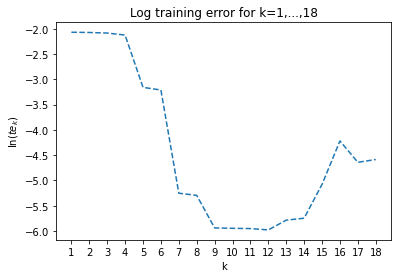

In [16]:
#Store the different polynomial bases dimensions from 1,...,18
k = np.arange(1, 19)

#This will store the training error i.e the MSE values of fitting the dataset with the polynomial basis of dimension k
te_k = np.zeros(len(k))

#This will store the weights for the different polynomial bases
w_k = []

#Iterate over each k
for i in range(len(k)):

  #Compute feature map from x
  x_transformed = PHI(x_train, k[i])

  #Compute weights using least squares regression - in case we encounter singular matrices, I've added the pseudoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Append to list of weights
  w_k.append(w)

  #Compute training error
  te_k[i] = MSE(x_transformed, g_train, w)
 
#Plot log training error
plt.figure()
plt.plot(k, np.log(te_k), linestyle='--')

#Extra plot formatting steps
plt.title('Log training error for k=1,...,18')
plt.xlabel('k')
plt.ylabel('$\ln(te_k)$')
plt.xticks(ticks=k)
plt.savefig('logte_k.png')
plt.show()

### Generate test set for $k = 1,...,18$

Using the `generate_data` function, I now create a mock test set.

In [17]:
#Generate test set of 1000 points using the previous data generator function
np.random.seed(100)
x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

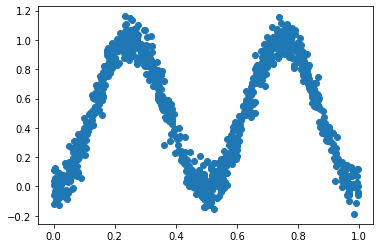

In [18]:
#Visualize data points
plt.figure()
plt.scatter(x_test, g_test)
plt.show()

### Generate test predictions and plot log test error

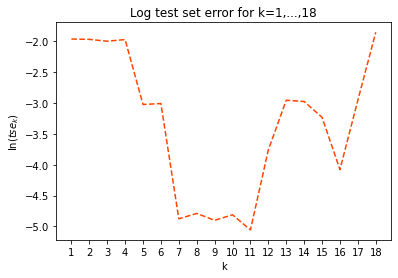

In [19]:
#Store the polynomial bases of k=1,...,18
k = np.arange(1, 19)

#This array will store the test set error for k=1,...,18
tse_k = np.zeros(len(k))

#Iterate over each k
for i in range(len(k)):
  #Compute feature map for test points
  x_test_transformed = PHI(x_test, k[i])

  #Compute the test set error using the weights created using the training set
  tse_k[i] = MSE(x_test_transformed, g_test, w_k[i])

#Plot log test set error
plt.figure()
plt.plot(k, np.log(tse_k), linestyle='--', color='orangered')

#Extra steps for plot formatting
plt.title('Log test set error for k=1,...,18')
plt.xlabel('k')
plt.ylabel('ln($tse_k$)')
plt.xticks(ticks=k)
plt.savefig("logtse_k.png")
plt.show()

### Perform 100 runs of experiment

We now repeat the previous experiment for 100 runs to average the errors over different types of training and test sets.

In [20]:
#For reproducible results
np.random.seed(10)

#Set the values for runs and the number of k values
runs = 100
k = 18

#These are matrices of shape (100, 18) which will store the training error and test error
te_k = np.zeros((runs, k))
tse_k = np.zeros((runs, k))

for i in range(runs):

  #Generate new training set
  x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

  #Generate new test set
  x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

  #Iterate over k values
  for j in range(k):
    #Create feature maps for training and testing data
    x_train_transformed = PHI(x_train, k=j+1)
    x_test_transformed = PHI(x_test, k=j+1)
    
    #Computing weights from training data. In case we encounter singular matrices, I've kept the psuedoinverse as backup
    try:
      w = np.linalg.inv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train

    #Compute training error and save value in the matrix
    te_k[i, j] = MSE(x_train_transformed, g_train, w) 
    #Compute testing error and save value in the matrix
    tse_k[i, j] = MSE(x_test_transformed, g_test, w)

  print(">> Run {} Completed!".format(i+1))

>> Run 1 Completed!
>> Run 2 Completed!
>> Run 3 Completed!
>> Run 4 Completed!
>> Run 5 Completed!
>> Run 6 Completed!
>> Run 7 Completed!
>> Run 8 Completed!
>> Run 9 Completed!
>> Run 10 Completed!
>> Run 11 Completed!
>> Run 12 Completed!
>> Run 13 Completed!
>> Run 14 Completed!
>> Run 15 Completed!
>> Run 16 Completed!
>> Run 17 Completed!
>> Run 18 Completed!
>> Run 19 Completed!
>> Run 20 Completed!
>> Run 21 Completed!
>> Run 22 Completed!
>> Run 23 Completed!
>> Run 24 Completed!
>> Run 25 Completed!
>> Run 26 Completed!
>> Run 27 Completed!
>> Run 28 Completed!
>> Run 29 Completed!
>> Run 30 Completed!
>> Run 31 Completed!
>> Run 32 Completed!
>> Run 33 Completed!
>> Run 34 Completed!
>> Run 35 Completed!
>> Run 36 Completed!
>> Run 37 Completed!
>> Run 38 Completed!
>> Run 39 Completed!
>> Run 40 Completed!
>> Run 41 Completed!
>> Run 42 Completed!
>> Run 43 Completed!
>> Run 44 Completed!
>> Run 45 Completed!
>> Run 46 Completed!
>> Run 47 Completed!
>> Run 48 Completed!
>

### Plot Results

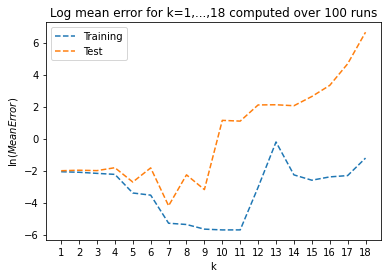

In [21]:
#Calculate the mean of the training and test set error
k_values = np.arange(1, k+1)
te_average = np.mean(te_k, axis=0)
tse_average = np.mean(tse_k, axis=0)

#Plot log of average training and test set error
plt.figure()
plt.plot(k_values, np.log(te_average), linestyle='--')
plt.plot(k_values, np.log(tse_average), linestyle='--')
#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(Mean Error)$')
plt.legend(['Training', 'Test'])
plt.xticks(ticks=k_values)
plt.title('Log mean error for k=1,...,18 computed over {} runs'.format(runs))
plt.savefig('100runs.png')
plt.show()

### Repeat experiments with new basis

The new basis is defined as follows: $$\{\sin(1\pi x), \sin(2\pi x), \sin(3\pi x),...,\sin(k\pi x)\}$$ 

I repeat the previous experiments again with this new basis.

In [22]:
#Computes the basis function
def phi_v2(x, k):
  """ Computes a single basis function, given input vector x of shape (m, 1) and value k. m is the number of training examples """
  return np.sin(k*np.pi*x)

#This function creates the feature map
def PHI_v2(x, k):
  """ Creates the feature map, which is a matrix of shape (m, k). Each column is the kth basis function applied on 
  the input vector x of shape (m, 1). m is the number of training examples """

  #Extract the number of training examples
  m = x.shape[0]
  
  #Initialize feature map matrix to matrix of zeros
  feature_map = np.zeros((m, k))

  #Iterative over each column
  for i in range(0, k):
    #For each column of the feature map matrix, replace the 0s with the computed kth basis function values
    feature_map[:, i] = phi_v2(x.squeeze(), i+1)
  return feature_map

In [23]:
#Generate new training data
np.random.seed(2)
x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

print("x_train shape: ", x_train.shape)
print("g_train shape: ", g_train.shape)

x_train shape:  (30,)
g_train shape:  (30,)


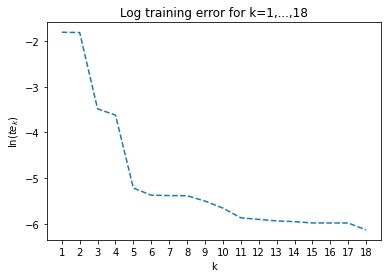

In [24]:
#Store an array of all the k values from 1,...,18
k = np.arange(1, 19)

#This array will store the training error i.e the MSE values of fitting the dataset with the polynomial basis of dimension k
te_k = np.zeros(len(k))

#This will store the weights computed over the training set for the different k's 
w_k = []

#Iterate over each k
for i in range(len(k)):

  #Compute feature map for training set
  x_transformed = PHI_v2(x_train, k[i])

  #Compute weights using least squares regression - in case we encounter singular matrices, I've used the psuedoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Append to list of weights
  w_k.append(w)

  #Compute training error
  te_k[i] = MSE(x_transformed, g_train, w)
 
#Plot log training error vs k
plt.figure()
plt.title('Log training error for k=1,...,18')
plt.plot(k, np.log(te_k), linestyle='--')

#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(te_k)$')
plt.xticks(ticks=k)
plt.savefig('new_basis_logte_k.png')
plt.show()

In [25]:
#Generate test set of 1000 points
np.random.seed(20)
x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

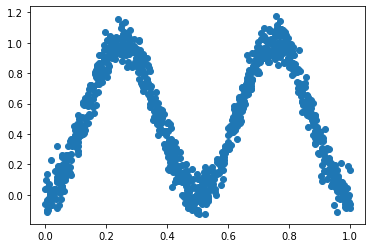

In [26]:
#Visualize test data points
plt.figure()
plt.scatter(x_test, g_test)
plt.show()

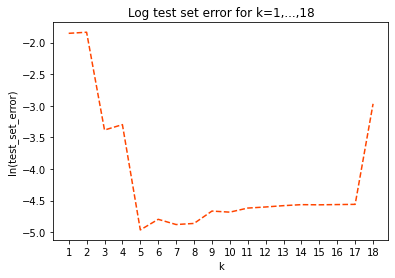

In [27]:
#Store an array of the k values
k = np.arange(1, 19)

#This array will store the test set errors over each k
tse_k = np.zeros(len(k))

#Iterate over each k
for i in range(len(k)):
  #Compute feature map for the test points
  x_test_transformed = PHI_v2(x_test, k[i])
  #Compute test set error using the weights computed using the training set
  tse_k[i] = MSE(x_test_transformed, g_test, w_k[i])

#Plot results
plt.figure()
plt.title('Log test set error for k=1,...,18')
plt.plot(k, np.log(tse_k), linestyle='--', color='orangered')
#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('ln(test_set_error)')
plt.xticks(ticks=k)
plt.savefig('new_basis_logtse_k.png')
plt.show()

In [28]:
#For ensuring reproducibility of results
np.random.seed(13)

#Store value for number of runs and the k
runs = 100
k = 18

#These matrices will store the training and test set error over each run for every k value
te_k = np.zeros((runs, k))
tse_k = np.zeros((runs, k))

#Iterate over the runs
for i in range(runs):

  #Generate new training set
  x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

  #Generate new test set
  x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

  #Iterate over k
  for j in range(k):

    #Create feature maps for training and testing data
    x_train_transformed = PHI_v2(x_train, k=j+1)
    x_test_transformed = PHI_v2(x_test, k=j+1)

    #Compute weights on training data - In case we encounter singular matrices, I've used the pseudoinverse as backup
    try:
      w = np.linalg.inv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train

    #Compute training error and save to results matrix
    te_k[i, j] = MSE(x_train_transformed, g_train, w) 
    #Compute testing error and save to results matrix
    tse_k[i, j] = MSE(x_test_transformed, g_test, w)

  print(">> Run {} Completed!".format(i+1))

>> Run 1 Completed!
>> Run 2 Completed!
>> Run 3 Completed!
>> Run 4 Completed!
>> Run 5 Completed!
>> Run 6 Completed!
>> Run 7 Completed!
>> Run 8 Completed!
>> Run 9 Completed!
>> Run 10 Completed!
>> Run 11 Completed!
>> Run 12 Completed!
>> Run 13 Completed!
>> Run 14 Completed!
>> Run 15 Completed!
>> Run 16 Completed!
>> Run 17 Completed!
>> Run 18 Completed!
>> Run 19 Completed!
>> Run 20 Completed!
>> Run 21 Completed!
>> Run 22 Completed!
>> Run 23 Completed!
>> Run 24 Completed!
>> Run 25 Completed!
>> Run 26 Completed!
>> Run 27 Completed!
>> Run 28 Completed!
>> Run 29 Completed!
>> Run 30 Completed!
>> Run 31 Completed!
>> Run 32 Completed!
>> Run 33 Completed!
>> Run 34 Completed!
>> Run 35 Completed!
>> Run 36 Completed!
>> Run 37 Completed!
>> Run 38 Completed!
>> Run 39 Completed!
>> Run 40 Completed!
>> Run 41 Completed!
>> Run 42 Completed!
>> Run 43 Completed!
>> Run 44 Completed!
>> Run 45 Completed!
>> Run 46 Completed!
>> Run 47 Completed!
>> Run 48 Completed!
>

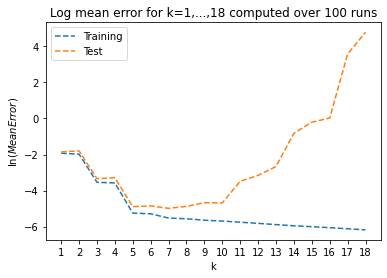

In [29]:
#Calculate mean of the train and test set error over the 100 runs
k_values = np.arange(1, k+1)
te_average = np.mean(te_k, axis=0)
tse_average = np.mean(tse_k, axis=0)

#Plot results
plt.figure()
plt.plot(k_values, np.log(te_average), linestyle='--')
plt.plot(k_values, np.log(tse_average), linestyle='--')

#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(Mean Error)$')
plt.legend(['Training', 'Test'])
plt.xticks(ticks=k_values)
plt.title('Log mean error for k=1,...,18 computed over {} runs'.format(runs))
plt.savefig('new_basis_100runs.png')
plt.show()